# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Broad ideas of the project implementation
1. Read Lecun's (with sermanet) paper referered to in the Lectures
2. Start with Lecun's lenet implementation
3. Experiment with hyperparameters (epochs/batchsize/learnrate/normalization/vary elements in layers)
4. Switch to Gray scale.
5. Add additional images for classes that has low samples
6. Download images from the web and test the model

** Achieved validation accuracy: 0.954, test accuracy: 0.942 **
** Accuracy on images downloaded from web: 0.5, However, apart from 1 picture, looking at the top 5 softmax probability,correct label does appear in top 5 probabilites list **

** I implemented Sermanet architecture, however, the validation accuracy didn't increase,and couldn't achive > 99 % validation accuracy as mentioned in Lecun's paper **

**Weights shall be initialized with truncated normal function rather than normal function, as weights can be too low and gradient may become very low and network stops learning, I started with normal dist and had to spend some time to find this "bug" as the accuracy was about 90%**

**A plot of train and validation accuracy after each epoch is useful as it gives useful info about convergence of accuracy, and helps tuning learnrate and keep_probability, overfitting**

---
## Step 0: Load The Data

*The data is already separated in training,validation and test set

In [19]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data
#load pickled train/valid and test data


training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Loading Training,Validation and Test data DONE!")

Loading Training,Validation and Test data DONE!


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [20]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[1])

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print("Summary Done!")


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43
Summary Done!


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Chosen Index in training set is: 6151
Picture is of type: 3


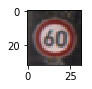

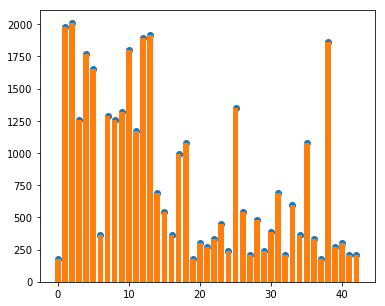

Max number of examples are of type:2 and the number of samples are:2010
Min number of examples are of type:0 and the number of samples are:180


In [21]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

#Plot samples and labels from training set

import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#plot a randomly selected image
index_train=random.randint(0, len(X_train))
print("Chosen Index in training set is:",index_train)
image_train = X_train[index_train]
plt.figure(figsize=(1,1))
plt.imshow(image_train)
print("Picture is of type:",y_train[index_train])

#count of each sign type
#n_classes = len(set(y_train))
plt.figure(2,figsize=(6,5))
count_signtypes={}
for stype in y_train:
    if stype not in count_signtypes:
        count_signtypes[stype]=1
    else:
        count_signtypes[stype] +=1

lists_t = sorted(count_signtypes.items()) # sorted by key, return a list of tuples

x_t, y_t = zip(*lists_t) # unpack a list of pairs into two tuples

plt.scatter(x_t, y_t)
#plt.bar(range(len(count_signtypes)),count_signtypes.values())
plt.bar(x_t,y_t,align='center')
plt.show()   
#print(count_signtypes[0],count_signtypes[1],count_signtypes[2],count_signtypes[3],count_signtypes[4],\
#      count_signtypes[5])
max_pics_train=np.argmax(y_t)
print("Max number of examples are of type:{} and the number of samples are:{}".format(x_t[max_pics_train],y_t[max_pics_train]))
print("Min number of examples are of type:{} and the number of samples are:{}".format(x_t[np.argmin(y_t)],y_t[np.argmin(y_t)]))

***The number of samples in quite a few bins are low***

**The highest bin has 2010 samples while lowest bin has 180 samples**

Chosen Index in Validation set is: 1617
Picture is of type: 9


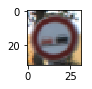

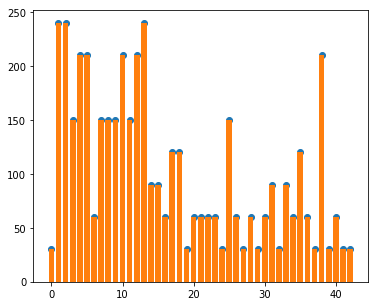

Max number of examples are of type:1 and the number of samples are:240
Min number of examples are of type:0 and the number of samples are:30


In [22]:
#Plot samples and labels from validation set
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#plot a randomly selected image
index_valid=random.randint(0, len(X_valid))
print("Chosen Index in Validation set is:",index_valid)
image_valid = X_valid[index_valid]
plt.figure(figsize=(1,1))
plt.imshow(image_valid)
print("Picture is of type:",y_valid[index_valid])

#count of each sign type
#n_classes = len(set(y_train))
plt.figure(2,figsize=(6,5))
count_signtypes_v={}
for stype in y_valid:
    if stype not in count_signtypes_v:
        count_signtypes_v[stype]=1
    else:
        count_signtypes_v[stype] +=1

lists_v = sorted(count_signtypes_v.items()) # sorted by key, return a list of tuples

x_v, y_v = zip(*lists_v) # unpack a list of pairs into two tuples

plt.scatter(x_v, y_v)
#plt.bar(range(len(count_signtypes)),count_signtypes.values())
plt.bar(x_v,y_v,align='center')
plt.show()   
#print(count_signtypes[0],count_signtypes[1],count_signtypes[2],count_signtypes[3],count_signtypes[4],\
#      count_signtypes[5])
max_pics_train_v=np.argmax(y_v)
print("Max number of examples are of type:{} and the number of samples are:{}".format(x_v[max_pics_train_v],y_v[max_pics_train_v]))
print("Min number of examples are of type:{} and the number of samples are:{}".format(x_v[np.argmin(y_v)],y_v[np.argmin(y_v)]))


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.


** The experiments performed to optimize model and hyperparameters were based on both colored vs Grayscaled images as well as
normalized and unnormalized images **
**unnormalized images (data in general) reduce efficiency of optimizer as the data might be far away from origin or dispersed/skewed **



In [118]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


#Lecun's paper describes better accuracy with grayscaled data, so our experiments will be with both colored and grayscaled
#although initial experiments are with colored images.



#Experiments with data:
#1. colored
#Colored data
#color='True'
#2. grayscale
color=False

#Exp with colored pictures and pictures not normalized


#norm='False'
#3. non normalized

norm=True
#4. normalized


print("Set color to: {} and Nomralized to: {}".format(color,norm))


Set color to: False and Nomralized to: True


** Some classes have very few samples (180 is the laeast in a class) ***
*** I am using affinine transforms from opencv library to generate slightly offset, slightly rotated, gaussian blurred copies of pictures ***

*** The idea here is to get to min 800 samples per class***
*** number 800 is derived from Lecun's paper on traffic sign classifier paper***

Train colored shape: (34799, 32, 32, 3)
valid colored shape: (4410, 32, 32, 3)
test colored shape: (12630, 32, 32, 3)
Train grayscale shape: (34799, 32, 32, 1)
valid grayscale shape: (4410, 32, 32, 1)
test grayscale shape: (12630, 32, 32, 1)
colored 100th and grayscaled 100th train/valid/test image:


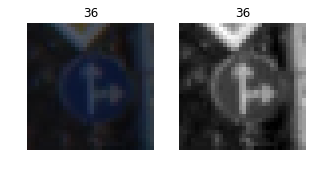

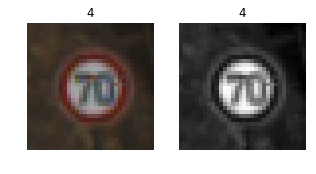

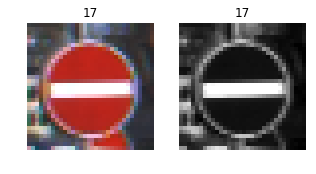

In [24]:
#convert to grayscale 
#initial setup was to conver images to grayscale only if color=='False'
#however to fecilitate rapid experimentation and hyperparameter tuning comparisons, all pictures are converted to grayscale
#without considering the color flag
import cv2
def rgb2gray(x):
    grimg=np.dot(x[...,:3], [0.299, 0.587, 0.114])
    return grimg[...,np.newaxis]

def rgb2gray_cv2(x):
    grimg = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    return grimg[...,np.newaxis]

#save a copy of colored image for plotting and comparison
X_train_color = X_train.copy()
X_valid_color = X_valid.copy()
X_test_color  = X_test.copy()
print('Train colored shape:', X_train_color.shape)
print('valid colored shape:', X_valid_color.shape)
print('test colored shape:', X_test_color.shape)
#if color=='False':
# Convert to grayscale

# Iterates through grayscale for each image in the data
def color_process(data):
    gray_images = []
    for image in data:
        gray = rgb2gray_cv2(image)
        gray_images.append(gray)
        
    return np.array(gray_images)

X_train_gray = color_process(X_train_color)
#X_train_gray =np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gray= color_process(X_valid_color)
#X_valid_gray =np.sum(X_valid/3, axis=3, keepdims=True)
X_test_gray = color_process(X_test_color)
#X_test_gray =np.sum(X_test/3, axis=3, keepdims=True)

print('Train grayscale shape:', X_train_gray.shape)
print('valid grayscale shape:', X_valid_gray.shape)
print('test grayscale shape:', X_test_gray.shape)
#plot and check color conversion
#convert to grayscale if color=='Fase'

#plot train image at 100 in color and grascale
print("colored 100th and grayscaled 100th train/valid/test image:")
index=1000
fig_t, axs_t = plt.subplots(1,2, figsize=(5, 5))
axs_t = axs_t.ravel()
fig_v, axs_v = plt.subplots(1,2, figsize=(5, 5))
axs_v = axs_v.ravel()
fig_te, axs_te = plt.subplots(1,2, figsize=(5, 5))
axs_te = axs_te.ravel()
cmp=['color','gray']
for i in range(2):
    axs_t[i].axis('off')
    axs_t[i].set_title(y_train[index])
    axs_v[i].axis('off')
    axs_te[i].axis('off')
    axs_v[i].set_title(y_valid[index])
    axs_te[i].set_title(y_test[index])
    if cmp[i]=='color':
        axs_t[i].imshow(X_train_color[index])
        axs_v[i].imshow(X_valid_color[index])
        axs_te[i].imshow(X_test_color[index])
    elif cmp[i]=='gray':
        axs_t[i].imshow(X_train_gray[index].squeeze(),cmap='gray')
        axs_v[i].imshow(X_valid_gray[index].squeeze(),cmap='gray')
        axs_te[i].imshow(X_test_gray[index].squeeze(),cmap='gray')


** Open cv function warpAffine is used to random translate (by upto 2 pixels),rotate and affine image generation **
** M matrix for affine transformation is created based on above requirements **
**another class of picture generated was gaussin blur using GaussianBlur function with 3x3 kernel**


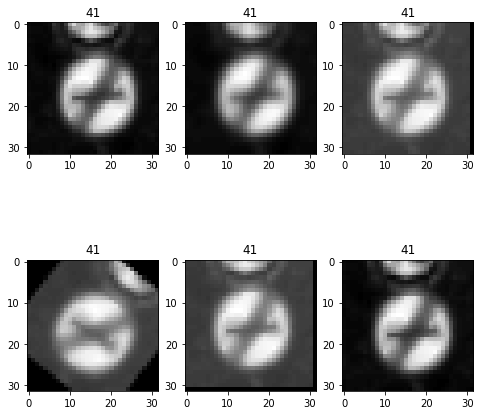

In [25]:
## Add warped/blurred/rotated images to bins that has <800 samples
#transforms applied only to grayscale images
##use opencv2 warpAffine method


import cv2
import numpy as np
#define transforms as functions
#Gaussian blur
def gaussian_blur(img,kernell=3,kernelw=3):
    #sigma and mu are set at zero, so are calculated based on kernel size
    return cv2.GaussianBlur(img,(kernell,kernelw),0)

#Translation:shifting of object's location
def img_translate(img,move=2):
    rows,cols,_ = img.shape
    #max number of pixels to translate is controlled by variable move
    #find pixels to move randomly between -move to +move
    x,y = np.random.randint(-move,move,2)
    #build M matrix
    M = np.float32([[1,0,x],[0,1,y]])
    return cv2.warpAffine(img,M,(cols,rows))

# Rotation
def img_rotate(img,rotation=45):
    rows,cols,_ = img.shape
    #find random rotation angle, default 90 degrees
    rot=np.random.randint(-rotation,rotation,1)
    #build M matrix 
    M = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1)
    return cv2.warpAffine(img,M,(cols,rows))

#Affine Transformation
#In affine transformation, all parallel lines in the original image will still be parallel in the output image
#To find the transformation matrix, we need three points from input image and their corresponding locations in output image. 
#Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine.

def img_affine_transform(img,move=2):
    rows,cols,_ = img.shape
    randm = np.random.randint(-move,move)
    #pts from img
    pts1 = np.float32([[cols/3,rows/3],[cols/3,2*rows/3],[2*cols/3,2*rows/3]])
    #pts on ret img
    pts2 = np.float32([[cols/3+randm,rows/3+randm],[cols/3+randm,2*rows/3+randm],[2*cols/3+randm,2*rows/3+randm]]) 
    #build M matrix
    M = cv2.getAffineTransform(pts1,pts2) 
    return cv2.warpAffine(img,M,(cols,rows))
    
#Perspective Transformation
#Straight lines will remain straight even after the transformation.
#For perspective transformation, you need a 3x3 transformation matrix.  
#To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. 
#Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function 
#cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix.

def img_pers_transform(img,move=2):
    rows,cols,_ = img.shape
    #random pts from image
    randm = np.random.randint(-move,move)
    #pts from image
    pts1 = np.float32([[randm,randm],[rows-randm,randm],[randm,cols-randm],[rows-randm,cols-randm]])
    
    #pts on ret img
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    
    #build 3x3 transform matrix
    M = cv2.getPerspectiveTransform(pts1,pts2)
     
    return cv2.warpPerspective(img,M,(rows,cols))

#lets plot some images based on the above transforms
index=0

img_gblur=gaussian_blur(X_train_gray[index])
img_translated=img_translate(X_train_gray[index])
img_rotated=img_rotate(X_train_gray[index])
img_affine_transformed=img_affine_transform(X_train_gray[index])
img_pers_transformed=img_pers_transform(X_train_gray[index])

fig_t, axs_t = plt.subplots(2,3, figsize=(8, 8))
axs_t = axs_t.ravel()
axs_t[0].set_title(y_valid[index])
axs_t[0].imshow(X_train_gray[index].squeeze(),cmap='gray')
axs_t[1].set_title(y_valid[index])
axs_t[1].imshow(img_gblur,cmap='gray')
axs_t[2].set_title(y_valid[index])
axs_t[2].imshow(img_translated,cmap='gray')
axs_t[3].set_title(y_valid[index])
axs_t[3].imshow(img_rotated,cmap='gray')
axs_t[4].set_title(y_valid[index])
axs_t[4].imshow(img_affine_transformed,cmap='gray')
axs_t[5].set_title(y_valid[index])
axs_t[5].imshow(img_pers_transformed,cmap='gray')

Total number of class bins 44


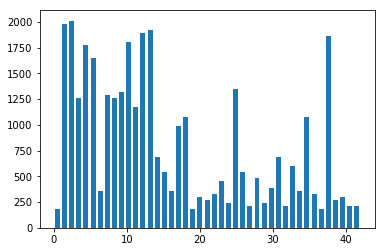

bin count for each sample [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
minimum samples for any label: 180
maximum samples for any label: 2010


In [26]:
## add to classes that has less than 500 samples
#build histogram pre adding samples
# use numpy histogram method
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
bin_number=bins.size
print("Total number of class bins",bin_number)
plt.bar(center, hist, align='center', width=width)

plt.show()

bin_sizes=np.bincount(y_train)
print("bin count for each sample",bin_sizes)
print("minimum samples for any label:", min(bin_sizes))
print("maximum samples for any label:", max(bin_sizes))

**In the cell below every calss with sample < 800 are applie with five transforms created in the cell above to add upto 800 images **

In [27]:
#add samples to training set, adding after normalization would more computationally efficient!!
#min saples per bin 
sample_threshold=800


#Lecun papers states making min samples in each to 800,
#so, method to apply shall be for classes with < 800 samples
#apply transforms on each images till the sample count reaches 800 and then stop, this preferred method
#compute efficiency is better + uniform boost to samples
rerun_image_transform=True
cls=0
#count upto 800 and then stop adding samples
count=0
while(rerun_image_transform):
    for i in bin_sizes:
        #print("In class:{} there are:{} samples".format(cls,i))
        
        if i < 800:
            count=i
            #list training samples in the given class
            imgs_class_i=np.where(y_train == cls)
            #print(len(imgs_class_i[0]))
            #for each samples apply 4 transform and append the transformed images to images to X_train_gray array
            for j in imgs_class_i[0]:
                #print(j,"cnt",count,end='')
                if count < 800:
                    index=j
                
                    img_gblur=gaussian_blur(X_train_gray[index],1,1)            
                    X_train_gray=np.concatenate((X_train_gray,[img_gblur.reshape(32,32,-1)]),axis=0)
                    y_train=np.concatenate((y_train,[cls]),axis=0)
                    #print("blur:",img_gblur.shape,"train",X_train_gray[index].shape )
                    img_translated=img_translate(X_train_gray[index])
                    X_train_gray=np.concatenate((X_train_gray,[img_translated.reshape(32,32,-1)]),axis=0)
                    y_train=np.concatenate((y_train,[cls]),axis=0)
                    img_rotated=img_rotate(X_train_gray[index])
                    X_train_gray=np.concatenate((X_train_gray,[img_rotated.reshape(32,32,-1)]),axis=0)
                    y_train=np.concatenate((y_train,[cls]),axis=0)
                    img_affine_transformed=img_affine_transform(X_train_gray[index])
                    X_train_gray=np.concatenate((X_train_gray,[img_affine_transformed.reshape(32,32,-1)]),axis=0)
                    y_train=np.concatenate((y_train,[cls]),axis=0)
                    img_pers_transformed=img_pers_transform(X_train_gray[index]) 
                    X_train_gray=np.concatenate((X_train_gray,[img_pers_transformed.reshape(32,32,-1)]),axis=0)
                    y_train=np.concatenate((y_train,[cls]),axis=0)
                    
                    
                    count += 5
                else:
                    print("class {} has {} sample".format(cls,count))
                    break
    
    
        #on to the next class
        cls +=1
        #all classes covered, then stop
        if cls==42:
            rerun_image_transform=False

print("Training Image addition done!")

class 0 has 800 sample
class 6 has 800 sample
class 14 has 800 sample
class 15 has 800 sample
class 16 has 800 sample
class 19 has 800 sample
class 20 has 800 sample
class 21 has 800 sample
class 22 has 800 sample
class 23 has 800 sample
class 24 has 800 sample
class 26 has 800 sample
class 27 has 800 sample
class 28 has 800 sample
class 29 has 800 sample
class 30 has 800 sample
class 31 has 800 sample
class 32 has 800 sample
class 33 has 804 sample
class 34 has 800 sample
class 36 has 800 sample
class 37 has 800 sample
class 39 has 800 sample
class 40 has 800 sample
class 41 has 800 sample
class 42 has 800 sample
Training Image addition done!


In [28]:
#add samples to validation set, This is just to increase stat on validation accuracy and see how much is accuracy on validation
#depends on number of samples in validation set

#Number of training examples = 34799
#Number of validation examples = 4410
#Number of testing examples = 12630
#not used for final results as this doesn't add any value, although validation set shall be about 20% of train,
#right now it is at: 4410/34799  --> 12.7%
#and test set is at : 12630/34799 --> 36.29%




#min saples per bin 
sample_threshold=100


#Lecun papers states making min samples in each to 800,
#so, method to apply shall be for classes with < 800 samples
#apply transforms on each images till the sample count reaches 800 and then stop, this preferred method
#compute efficiency is better + uniform boost to samples
rerun_image_transform_v=False
cls_v=0
#count upto 100 and then stop adding samples
count_v=0

bin_sizes_v=np.bincount(y_valid)
while(rerun_image_transform_v):
    for i in bin_sizes_v:
        #print("In class:{} there are:{} samples".format(cls_v,i))
        
        if i < 100:
            count_v=i
            #list training samples in the given class
            imgs_class_i=np.where(y_valid == cls_v)
            #print(len(imgs_class_i[0]))
            #for each samples apply 4 transform and append the transformed images to images to X_train_gray array
            for j in imgs_class_i[0]:
                #print(j,"cnt",count_v,end='')
                if count_v < 100:
                    index_v=j
                
                    img_gblur=gaussian_blur(X_valid_gray[index_v],1,1)            
                    X_valid_gray=np.concatenate((X_valid_gray,[img_gblur.reshape(32,32,-1)]),axis=0)
                    y_valid=np.concatenate((y_valid,[cls]),axis=0)
                    #print("blur:",img_gblur.shape,"train",X_train_gray[index].shape )
                    img_translated=img_translate(X_valid_gray[index_v])
                    X_valid_gray=np.concatenate((X_valid_gray,[img_translated.reshape(32,32,-1)]),axis=0)
                    y_valid=np.concatenate((y_valid,[cls]),axis=0)
                    img_rotated=img_rotate(X_valid_gray[index_v])
                    X_valid_gray=np.concatenate((X_valid_gray,[img_rotated.reshape(32,32,-1)]),axis=0)
                    y_valid=np.concatenate((y_valid,[cls]),axis=0)
                    img_affine_transformed=img_affine_transform(X_valid_gray[index_v])
                    X_valid_gray=np.concatenate((X_valid_gray,[img_affine_transformed.reshape(32,32,-1)]),axis=0)
                    y_valid=np.concatenate((y_valid,[cls]),axis=0)
                    img_pers_transformed=img_pers_transform(X_valid_gray[index_v]) 
                    X_valid_gray=np.concatenate((X_valid_gray,[img_pers_transformed.reshape(32,32,-1)]),axis=0)
                    y_valid=np.concatenate((y_valid,[cls]),axis=0)
                    
                    
                    count_v += 5
                else:
                    print("class {} has {} sample".format(cls_v,count_v))
                    break
    
    
        #on to the next class
        cls_v +=1
        #all classes covered, then stop
        if cls_v==42:
            rerun_image_transform_v=False

print("Valid Image addition done!")

Valid Image addition done!


** Result of added images is pickled and saved so that the images generation need not be regenerated **

In [29]:
#save train and valid as pickle to load to avoid applying transform every time
import pickle
f_train_im=open('xtrain_with_transform_800min.pickle','wb')
f_train_label=open('ytrain_with_transform_800min.pickle','wb')
pickle.dump(X_train_gray,f_train_im)
pickle.dump(y_train,f_train_label)

f_train_im.close()
f_train_label.close()


#f_valid_im=open('xvalid_with_transform_100min.pickle','wb')
#f_valid_label=open('yvalid_with_transform_100min.pickle','wb')
#pickle.dump(X_valid_gray,f_valid_im)
#pickle.dump(y_valid,f_valid_label)

#f_valid_im.close()
#f_valid_label.close()


Number of training examples = 46484
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


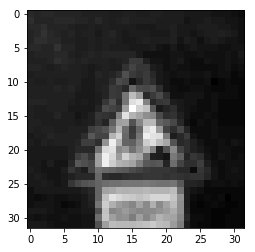

In [30]:
#Recalculate stats on data
#earlier stats
#Number of training examples = 34799
#Number of validation examples = 4410
#Number of testing examples = 12630
#Image data shape = (32, 32)
#Number of classes = 43


# Number of training examples
n_train = X_train_gray.shape[0]

# Number of validation examples
n_validation = X_valid_gray.shape[0]

# Number of testing examples.
n_test = X_test_gray.shape[0]

# What's the shape of an traffic sign image?
image_shape = (X_train_gray.shape[1],X_train_gray.shape[1])

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

plt.imshow(X_train_gray[34500].squeeze(),cmap='gray')

** Looking at above picture the transformations applied need tuning as the image above almost doesn't add much value**
**Below histogram to confirm that min sample per class is 800 **

Total number of class bins 44


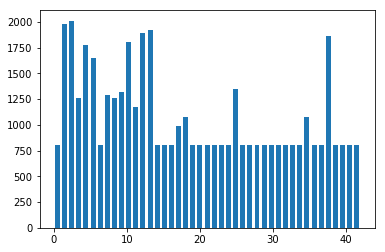

bin count for each sample [ 800 1980 2010 1260 1770 1650  800 1290 1260 1320 1800 1170 1890 1920  800
  800  800  990 1080  800  800  800  800  800  800 1350  800  800  800  800
  800  800  800  804  800 1080  800  800 1860  800  800  800  800]
minimum samples for any label: 800
maximum samples for any label: 2010


In [31]:
## new histogram of classes
#build histogram pre adding samples
# use numpy histogram method
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
bin_number=bins.size
print("Total number of class bins",bin_number)
plt.bar(center, hist, align='center', width=width)

plt.show()

bin_sizes=np.bincount(y_train)
print("bin count for each sample",bin_sizes)
print("minimum samples for any label:", min(bin_sizes))
print("maximum samples for any label:", max(bin_sizes))

** Normalize the data, again to have flexibility to experiment with colored or grayscaled or normalized vs non-normalized data
all the flavors of data, colored,grayscaled,normalized and non-normalized are kept as  arrays **

mean of colored Train data before normalization: 82.677589037
mean of colored Valid data before normalization: 83.5564273756
mean of colored Test data before normalization: 82.1484603612
mean of colored Train data after normalization: -0.175774160639
mean of colored Valid data after normalization: -0.172327735782
mean of colored Test data after normalization: -0.177849175054
mean of grayscaled Train data before normalization: 79.7863387805
mean of grayscaled Valid data before normalization: 81.9523909173
mean of grayscaled Test data before normalization: 80.4949869018
mean of grayscaled Train data after normalization: -0.187112396939
mean of grayscaled Valid data after normalization: -0.178618074834
mean of grayscaled Test data after normalization: -0.184333384699


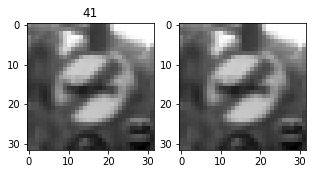

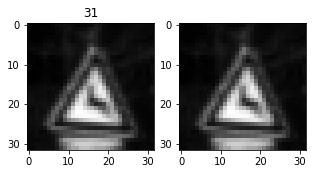

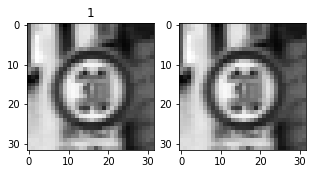

In [32]:

#normalization is done scale pix value between -1,1


# X_train and X_valid is either normalized or not based on variable norm=True or False

#plot orig and normalized image

print("mean of colored Train data before normalization:",np.mean(X_train_color))
print("mean of colored Valid data before normalization:",np.mean(X_valid_color))
print("mean of colored Test data before normalization:",np.mean(X_test_color))



#colored picture normalized
#X_train_color_norm=(X_train_color-128.)/128
#X_valid_color_norm=(X_valid_color-128.)/128
#X_test_color_norm=(X_test_color-128.)/128


X_train_color_norm=X_train_color/255. -0.5 
X_valid_color_norm=X_valid_color/255. -0.5
X_test_color_norm=X_test_color/255. -0.5


print("mean of colored Train data after normalization:",np.mean(X_train_color_norm))
print("mean of colored Valid data after normalization:",np.mean(X_valid_color_norm))
print("mean of colored Test data after normalization:",np.mean(X_test_color_norm))


#index=100
#fig_t, axs_t = plt.subplots(1,2, figsize=(5, 5))
#axs_t = axs_t.ravel()
#axs_t[0].imshow(X_train_color[index])
#axs_t[1].imshow(X_train_color_norm[index])
#axs_t[0].set_title(y_train[index])
#
#fig_v, axs_v = plt.subplots(1,2, figsize=(5, 5))
#axs_v = axs_v.ravel()
#axs_v[0].imshow(X_valid_color[index])
#axs_v[1].imshow(X_valid_color_norm[index])
#axs_v[0].set_title(y_valid[index])
#
#fig_te, axs_te = plt.subplots(1,2, figsize=(5, 5))
#axs_te = axs_te.ravel()
#axs_te[0].imshow(X_test_color[index])
#axs_te[1].imshow(X_test_color_norm[index])
#axs_te[0].set_title(y_test[index])



print("mean of grayscaled Train data before normalization:",np.mean(X_train_gray))
print("mean of grayscaled Valid data before normalization:",np.mean(X_valid_gray))
print("mean of grayscaled Test data before normalization:",np.mean(X_test_gray))

#grayscaled picture normalized
#X_train_gray_norm=(X_train_gray-128.)/128
#X_valid_gray_norm=(X_valid_gray-128.)/128
#X_test_gray_norm=(X_test_gray-128.)/128

X_train_gray_norm=X_train_gray/255.0 -0.5
X_valid_gray_norm=X_valid_gray/255.0 -0.5
X_test_gray_norm = X_test_gray/255.0  -0.5 

print("mean of grayscaled Train data after normalization:",np.mean(X_train_gray_norm))
print("mean of grayscaled Valid data after normalization:",np.mean(X_valid_gray_norm))
print("mean of grayscaled Test data after normalization:",np.mean(X_test_gray_norm))



index=100
fig_t, axs_t = plt.subplots(1,2, figsize=(5, 5))
axs_t = axs_t.ravel()
axs_t[0].imshow(X_train_gray[index].squeeze(),cmap='gray')
axs_t[1].imshow(X_train_gray_norm[index].squeeze(),cmap='gray')
axs_t[0].set_title(y_train[index])
#
fig_v, axs_v = plt.subplots(1,2, figsize=(5, 5))
axs_v = axs_v.ravel()
axs_v[0].imshow(X_valid_gray[index].squeeze(),cmap='gray')
axs_v[1].imshow(X_valid_gray_norm[index].squeeze(),cmap='gray')
axs_v[0].set_title(y_valid[index])
#
fig_te, axs_te = plt.subplots(1,2, figsize=(5, 5))
axs_te = axs_te.ravel()
axs_te[0].imshow(X_test_gray[index].squeeze(),cmap='gray')
axs_te[1].imshow(X_test_gray_norm[index].squeeze(),cmap='gray')
axs_te[0].set_title(y_test[index])

    

Grayscaled pictures Normalized are used for training,validation and test


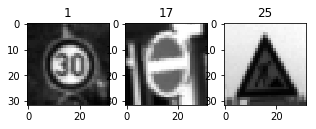

In [33]:
#in this cell based on experiment objective, colored or grayscale and normalized or unnormalized data is assigned to 
#X_train/X_valid/X_test dataset


#combinations of data usage
#color==norm=='True'
#color='True', Norm='False'
#color==norm=='False' --> grayscale non normalized
#color='False', norm='True'



if color==True and norm==False:
    print("Colored pictures Unnormalized are used for training,validation and test")
    X_train=X_train_color
    X_valid=X_valid_color
    X_test=X_test_color
elif color==True and norm==True:
    print("Colored pictures Normalized are used for training,validation and test")
    X_train=X_train_color_norm
    X_valid=X_valid_color_norm
    X_test=X_test_color_norm
elif color==False and norm==False:
    print("GrayScaled pictures unnormalized are used for training,validation and test")
    X_train=X_train_gray
    X_valid=X_valid_gray
    X_test=X_test_gray
elif color==False and norm==True:
    print("Grayscaled pictures Normalized are used for training,validation and test")
    X_train=X_train_gray_norm
    X_valid=X_valid_gray_norm
    X_test=X_test_gray_norm

    
#grayscale pictures are size 32x32, reshape to 32x32x1    
#nr_train_samples=X_train.shape[0]
#print("nr of training samples",nr_train_samples)
#X_train=X_train.reshape(nr_train_samples,32,32,-1)
#print(X_train.shape)

#nr_valid_samples=X_valid.shape[0]
#X_valid=X_valid.reshape(nr_valid_samples,32,32,-1)
#print(X_valid.shape)

#nr_test_samples=X_test.shape[0]
#X_test=X_test.reshape(nr_test_samples,32,32,-1)
#print(X_valid.shape)


############
index=4000
fig_t, axs_t = plt.subplots(1,3, figsize=(5, 5))
axs_t = axs_t.ravel()
axs_t[0].imshow(X_train[index].squeeze(),cmap='gray')
axs_t[0].set_title(y_train[index])

axs_t[1].imshow(X_valid[index].squeeze(),cmap='gray')
axs_t[1].set_title(y_valid[index])

axs_t[2].imshow(X_test[index].squeeze(),cmap='gray')
axs_t[2].set_title(y_test[index])


** The original training data is sorted by class, hence shuffling the data is mandatory **

In [34]:
#shuffle the training and valid data -
from sklearn.utils import shuffle

#Shuffle original train data
#plt.imshow(X_train[1].squeeze())
X_train, y_train = shuffle(X_train, y_train)

print("samples in training",X_train.shape[0])
#plotted grayscale
#print(X_train[1].shape)
#plt.figure(2)
#plt.imshow(X_train[1].squeeze(),cmap='gray')


#Shuffle original valid data
#plt.figure(3)
#plt.imshow(X_valid[1])
X_valid, y_valid = shuffle(X_valid, y_valid)
#plt.figure(4)
#plt.imshow(X_valid[1])
print("samples in valid",X_valid.shape[0])


samples in training 46484
samples in valid 4410


### Model Architecture

### Define your architecture here.
### Feel free to use as many code cells as needed.

In [105]:
#import tensor flow
#set epochs and batch size
import tensorflow as tf

#EPOCHS = 10
#EPOCHS=30
#EPOCHS=40
EPOCHS=60
BATCH_SIZE = 128
#BATCH_SIZE =256

print("Epoch :{}, Batch_size:{}".format(EPOCHS,BATCH_SIZE))

Epoch :60, Batch_size:128


## Implement the LeNet-5 neural network architecture.

**Input**
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. German traffic images are colored, C is 3 in this case.

**Output**
German traffic images has 43 labels, so output will be 43.

**Model Architecture**
* Layer 1: Convolutional. The output shape is 28x28x6.
* Activation. Relu is used as activation function.
* Pooling. The output shape is 14x14x6.
* droput (experimented with and without dropout)
* Layer 2: Convolutional. The output shape is 10x10x16.
* Activation. Relu activation function is used.
* Pooling. The output shape is 5x5x16.
* dropout (experimented with and without dropout)
* Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. 
* Layer 3: Fully Connected. This has 120 outputs.
* Activation. relu function is used
* dropout (experimented with and without dropout)
* Layer 4: Fully Connected. This has 84 outputs.
* Activation. relu activation function
* dropout (experimented with and without dropout)
* Layer 5: Fully Connected (Logits). This has 43 outputs.
* Output
Return the result of the logits connected layer.

![title](lenet.png) 

In [36]:
from tensorflow.contrib.layers import flatten


def conv2d(x, W, b, strides=1,padarg='SAME'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padarg)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool(x, k=2,stride=2,padarg='SAME'):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1,stride,stride, 1],
        padding=padarg)
#already set in second cell (len(set(y_train)))
#n_classes=(len(set(y_train)))
keep_prob=tf.placeholder(tf.float32)



###########################################
#mu = 0
#sigma = 0.1
#Data needs regularization? X-mu/sigma ??
#the random samples for weights needs to be mean mu and std of sigma
#weights = {
#'wc1': tf.Variable(tf.random_normal([5, 5, 3, 6], mean = mu, stddev = sigma)),
#'wc2': tf.Variable(tf.random_normal([5, 5, 6, 16],mean = mu, stddev = sigma)),
#'wd1': tf.Variable(tf.random_normal([5*5*16, 120],mean = mu, stddev = sigma)),
#'wd2': tf.Variable(tf.random_normal([120, 84],mean = mu, stddev = sigma)),
#'out': tf.Variable(tf.random_normal([84, n_classes],mean = mu, stddev = sigma))}

#biases = {
#'bc1': tf.Variable(tf.random_normal([6], mean = mu, stddev = sigma)),
#'bc2': tf.Variable(tf.random_normal([16], mean = mu, stddev = sigma)),
#'bd1': tf.Variable(tf.random_normal([120], mean = mu, stddev = sigma)),
#'bd2': tf.Variable(tf.random_normal([84], mean = mu, stddev = sigma)),
#'out': tf.Variable(tf.random_normal([n_classes], mean = mu, stddev = sigma))}


#if weights and biases are global then they must be reset with each experiments
#weights_c = {
#'wc1': tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean = mu, stddev = sigma),name='wcc1'),
#'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma),name='wcc2'),
#'wd1': tf.Variable(tf.truncated_normal([5*5*16, 120], mean = mu, stddev = sigma),name='wcd1'),
#'wd2': tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma),name='wcd2'),
#'out': tf.Variable(tf.truncated_normal([84, n_classes], mean = mu, stddev = sigma),name='wcout')}
#biases_c = {
#'bc1': tf.Variable(tf.truncated_normal([6], mean = mu, stddev = sigma),name='bcc1'),
#'bc2': tf.Variable(tf.truncated_normal([16], mean = mu, stddev = sigma),name='bcc2'),
#'bd1': tf.Variable(tf.truncated_normal([120], mean = mu, stddev = sigma),name='bcd1'),
#'bd2': tf.Variable(tf.truncated_normal([84], mean = mu, stddev = sigma),name='bcd2'),
#'out': tf.Variable(tf.truncated_normal([n_classes], mean = mu, stddev = sigma),name='bcout')}



############################################

def LeNet(x):  
    
    #print("shape of X is:",x.shape)
    #print("lenetX",x[0,19:21,14:20,0])
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    weights_c = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean = mu, stddev = sigma),name='wcc1'),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma),name='wcc2'),
    'wd1': tf.Variable(tf.truncated_normal([5*5*16, 120], mean = mu, stddev = sigma),name='wcd1'),
    'wd2': tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma),name='wcd2'),
    'out': tf.Variable(tf.truncated_normal([84, n_classes], mean = mu, stddev = sigma),name='wcout')}
    biases_c = {
    'bc1': tf.Variable(tf.truncated_normal([6], mean = mu, stddev = sigma),name='bcc1'),
    'bc2': tf.Variable(tf.truncated_normal([16], mean = mu, stddev = sigma),name='bcc2'),
    'bd1': tf.Variable(tf.truncated_normal([120], mean = mu, stddev = sigma),name='bcd1'),
    'bd2': tf.Variable(tf.truncated_normal([84], mean = mu, stddev = sigma),name='bcd2'),
    'out': tf.Variable(tf.truncated_normal([n_classes], mean = mu, stddev = sigma),name='bcout')}
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    
    conv1=conv2d(x, weights_c['wc1'], biases_c['bc1'], 1,'VALID')
    
    #Pooling1. Input = 28x28x6. Output = 14x14x6.
    conv1=maxpool(conv1, 2,2,'VALID')
    
    #Dropout
    conv1 = tf.nn.dropout(conv1, keep_prob)

    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2=conv2d(conv1, weights_c['wc2'], biases_c['bc2'], 1,'VALID')


    # Pooling2. Input = 10x10x16. Output = 5x5x16.
    conv2=maxpool(conv2, 2,2,'VALID')
    #Dropout
    conv2 = tf.nn.dropout(conv2, keep_prob)
 
    # Flatten. Input = 5x5x16. Output = 400.
    #print("WW1",weights['wd1'].get_shape().as_list()[0])
    #print("WW2",weights['wd1'].get_shape().as_list())
    
    #fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1=flatten(conv2)
    #print("WW3",fc1.get_shape().as_list())
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc1, weights_c['wd1']), biases_c['bd1'])
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    #drop out
    fc1 = tf.nn.dropout(fc1, keep_prob)

    #  Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights_c['wd2']), biases_c['bd2'])
    # Activation.
    fc2=tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    
    logits = tf.add(tf.matmul(fc2, weights_c['out']), biases_c['out'])
    #print('WW4',logits.get_shape().as_list())
    return logits

##Implement the LeNet-5 neural network architecture.

**Input**

The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. German traffic images are converted to grayscale hence C=1 in this case.

**The submitted model is based on gray scale **

**Output**

German traffic images has 43 labels, so output will be 43.

##Model Architecture

* Layer 1: Convolutional. The output shape is 28x28x6.
* Activation. Relu is used as activation function.
* Pooling. The output shape is 14x14x6.
* droput (experimented with and without dropout)
* Layer 2: Convolutional. The output shape is 10x10x16.
* Activation. Relu activation function is used.
* Pooling. The output shape is 5x5x16.
* dropout (experimented with and without dropout)
* Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten.
* Layer 3: Fully Connected. This has 200 outputs.
* Activation. relu function is used
* dropout (experimented with and without dropout)
* Layer 4: Fully Connected. This has 100 outputs.
* Activation. relu activation function
* dropout (experimented with and without dropout)
* Layer 5: Fully Connected (Logits). This has 43 outputs.

Output Return the result of the logits connected layer.

In [106]:
from tensorflow.contrib.layers import flatten


def conv2d(x, W, b, strides=1,padarg='SAME',scopea='tmp'):
    with tf.name_scope("scopea") as scope:
        x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padarg)
        x = tf.nn.bias_add(x, b)
        return tf.nn.relu(x,name=scope+'relu')


def maxpool(x, k=2,stride=2,padarg='SAME',scopea='tmp'):
    with tf.name_scope("scopea") as scope:
        return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1,stride,stride, 1],
        padding=padarg,name=scope+'mxpool')

#n_classes=


# tf Graph input
#x = tf.placeholder(tf.float32, [None, 32, 32, 1])
#y = tf.placeholder(tf.float32, [None, n_classes])
#keep_prob = tf.placeholder(tf.float32)


def LeNet_gray(x):  
    
    #print("shape of X is:",x.shape)
    #print("lenetX",x[0,19:21,14:20,0])
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    #Data needs regularization? X-mu/sigma ??
    #the random samples for weights needs to be mean mu and std of sigma
    #################################################################################
    
    weights_g = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean = mu, stddev = sigma),name='wc1'),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16],mean = mu, stddev = sigma),name='wc2'),
    'wd1': tf.Variable(tf.truncated_normal([5*5*16, 200],mean = mu, stddev = sigma),name='wd1'),
    'wd2': tf.Variable(tf.truncated_normal([200, 100],mean = mu, stddev = sigma),name='wd2'),
    'out': tf.Variable(tf.truncated_normal([100, n_classes],mean = mu, stddev = sigma),name='wout')}

    biases_g = {
    'bc1': tf.Variable(tf.truncated_normal([6], mean = mu, stddev = sigma),name='bc1'),
    'bc2': tf.Variable(tf.truncated_normal([16], mean = mu, stddev = sigma),name='bc2'),
    'bd1': tf.Variable(tf.truncated_normal([200], mean = mu, stddev = sigma),name='bd1'),
    'bd2': tf.Variable(tf.truncated_normal([100], mean = mu, stddev = sigma),name='bd2'),
    'out': tf.Variable(tf.truncated_normal([n_classes], mean = mu, stddev = sigma),name='bout')}

    ###########################################################################################


    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    
    conv1=conv2d(x, weights_g['wc1'], biases_g['bc1'], 1,'VALID','conv1')
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1=maxpool(conv1, 2,2,'VALID','conv1')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2=conv2d(conv1, weights_g['wc2'], biases_g['bc2'], 1,'VALID','conv2')

    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2=maxpool(conv2, 2,2,'VALID','conv2')

    
    with tf.name_scope("fc1") as scope:  
        fc1=flatten(conv2)
        #print("WW3",fc1.get_shape().as_list())
    
        # TODO: Layer 3: Fully Connected. Input = 400. Output = 120 --> 200.
        fc1 = tf.add(tf.matmul(fc1, weights_g['wd1']), biases_g['bd1'],name=scope+'_add')

    
        # TODO: Activation.
        fc1 = tf.nn.relu(fc1,name=scope+'_relu')
        fc1 = tf.nn.dropout(fc1, keep_prob,name=scope+'_dropout')
        # TODO: Layer 4: Fully Connected. Input = 120 --> 200. Output = 100.
    
    with tf.name_scope("fc2") as scope:
        fc2 = tf.add(tf.matmul(fc1, weights_g['wd2']), biases_g['bd2'],name=scope+'_add')
        # TODO: Activation.
        fc2=tf.nn.relu(fc2,name=scope+'_relu')
        fc2 = tf.nn.dropout(fc2, keep_prob,name=scope+'_dropout')
        # TODO: Layer 5: Fully Connected. Input = 100. Output = 43.
    with tf.name_scope("logits") as scope:
        logits = tf.add(tf.matmul(fc2, weights_g['out']), biases_g['out'],name=scope+'_add')
        #print('WW4',logits.get_shape().as_list())
        return logits

![text](sermanet.png)

##Implement the Sermanet neural network architecture.

**Input**

The sermanet architecture (lecun and sermanet paper) accepts a 32x32xC image as input, where C is the number of color channels. German traffic images are converted to grayscale hence C=1 in this case.



**Output**

German traffic images has 43 labels, so output will be 43.

##Model Architecture

* Layer 1: Convolutional. The output shape is 28x28x6.
* Activation. Relu is used as activation function.
* Pooling. The output shape is 14x14x6.
* droput (experimented with and without dropout)
* Layer 2: Convolutional. The output shape is 10x10x16.
* Activation. Relu activation function is used.
* Pooling. The output shape is 5x5x16.
* dropout (experimented with and without dropout)
* 2nd layer also has consist of a convolution layer without maxpooling, output shape is 1x1x400
* Flatten 3rd and 2nd layer outputs. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. 
* Layer 3: Fully Connected. This has 800 outputs (400 each from 2 sublayers in layer 2, 5x5x16 and 1x1x400).
* Layer 4: Fully Connected (Logits). This has 43 outputs.

Output Return the result of the logits  fully connected layer.

In [38]:
#Sermanet  implementation
from tensorflow.contrib.layers import flatten


def conv2d(x, W, b, strides=1,padarg='SAME'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padarg)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool(x, k=2,stride=2,padarg='SAME'):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1,stride,stride, 1],
        padding=padarg)



def sermanet(x):  
    
    #print("shape of X is:",x.shape)
    #print("lenetX",x[0,19:21,14:20,0])
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    #Data needs regularization? X-mu/sigma ??
    #the random samples for weights needs to be mean mu and std of sigma
    #################################################################################
    
    weights_g = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16],mean = mu, stddev = sigma)),
    'wc3': tf.Variable(tf.truncated_normal([5, 5, 16, 400],mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal([800, 200],mean = mu, stddev = sigma)),
    'wd2': tf.Variable(tf.truncated_normal([200, 84],mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal([800, n_classes],mean = mu, stddev = sigma))}

    biases_g = {
    'bc1': tf.Variable(tf.truncated_normal([6], mean = mu, stddev = sigma)),
    'bc2': tf.Variable(tf.truncated_normal([16], mean = mu, stddev = sigma)),
    'bc3': tf.Variable(tf.truncated_normal([400], mean = mu, stddev = sigma)),
    'bd1': tf.Variable(tf.truncated_normal([200], mean = mu, stddev = sigma)),
    'bd2': tf.Variable(tf.truncated_normal([84], mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal([n_classes], mean = mu, stddev = sigma))}

    ###########################################################################################

    
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    
    conv1=conv2d(x, weights_g['wc1'], biases_g['bc1'], 1,'VALID')
    #conv1=tf.nn.conv2d(x,weights['wc1'], strides=[1, 1, 1, 1], padding='VALID')
    #conv1 = tf.nn.bias_add(conv1, biases['bc1'])
    
    # TODO: Activation.
    #conv1 = tf.nn.relu(conv1)
    
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1=maxpool(conv1, 2,2,'VALID')
    #conv1=tf.nn.max_pool(
    #    conv1,
    #    ksize=[1, 2, 2, 1],
    #    strides=[1,2,2, 1],
    #    padding='SAME')
    conv1 = tf.nn.dropout(conv1, keep_prob)
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2=conv2d(conv1, weights_g['wc2'], biases_g['bc2'], 1,'VALID')
    #conv2=tf.nn.conv2d(conv1,weights['wc2'], strides=[1, 1, 1, 1], padding='VALID')
    #conv2 = tf.nn.bias_add(conv2, biases['bc2'])
    
    
    # TODO: Activation.
    #conv2 = tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2=maxpool(conv2, 2,2,'VALID')
    #conv2=tf.nn.max_pool(
    #    conv2,
    #    ksize=[1, 2, 2, 1],
    #    strides=[1,2,2, 1],
    #    padding='SAME')
    #print("WW0",conv2.get_shape().as_list())
    conv2 = tf.nn.dropout(conv2, keep_prob)
    
    # TODO: Layer 3: Convolutional. input 5x5x16 Output = 1x1x400.
    conv3=conv2d(conv2, weights_g['wc3'], biases_g['bc3'], 1,'VALID')
    
    # TODO: Flatten. Input = 1x1x400. Output = 400.

    layer2=flatten(conv2)
    layer3=flatten(conv3)
    #print("WW3",fc1.get_shape().as_list())
    fc1 = tf.concat([layer2, layer3], 1)
    print("fc1 shape:",fc1.get_shape())

    # TODO: Layer 3: Fully Connected. Input = 800. Output = n_classes.

    logits = tf.add(tf.matmul(fc1, weights_g['out']), biases_g['out'])
    #print('WW4',logits.get_shape().as_list())
    return logits


In [107]:
#Features and labels
#rgb_channel=3
rgb_channel=1
x = tf.placeholder(tf.float32, (None, 32, 32, rgb_channel))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob=tf.placeholder(tf.float32)
#print(n_classes)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

**The cells below use same implementation as in Lenet digit recognition project**

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [108]:
#Training pipeline
#rate = 0.001
rate=0.0005
#logits = LeNet(x)

logits = LeNet_gray(x)

#logits = sermanet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

##L2 reg
#beta=0.01
#regularizers = tf.nn.l2_loss(weights['wc1']) + tf.nn.l2_loss(weights['wc2']) + tf.nn.l2_loss(weights['wd1']) \
#+ tf.nn.l2_loss(weights['wd2']) \
#    + tf.nn.l2_loss(weights['out'])
#loss_operation = tf.reduce_mean(loss_operation + beta * regularizers)


##ADAM optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#Gradient descent optimizer
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=rate)
#training_operation = optimizer.minimize(loss_operation)

In [ ]:
#tf.histogram_summary('w1',weights['wc1'])
#tf.scalar_summary('cost',training_operation)
#tf.scalar_summary('accuracy',accuracy_operation)



In [109]:
#no dropout on validation data
drop_prob_valid=1.0

#Model Eval
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:drop_prob_valid})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [110]:
#use dropout or not is decided by a flag use_drop_out,
drop_prob_train=1.0


#use_drop_out=False
use_drop_out=True

if use_drop_out:
    drop_prob_train=0.5 
    #drop_prob_train=0.7
else:
    drop_prob_train=1.0
    
print("Use dropout:{}, dropout thres:{}".format(use_drop_out,drop_prob_train))

train_acc=[]
valid_acc=[]

#Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    #print()
    for i in range(EPOCHS):
        #already shuffled
        X_train, y_train = shuffle(X_train, y_train)
               
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:drop_prob_train})
            train_acc.append(sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1.0}))

                
        

        validation_accuracy = evaluate(X_valid, y_valid)
        valid_acc.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet_german_traffic_sign')
    print("Model saved")

Use dropout:True, dropout thres:0.5
Training...
EPOCH 1 ...
Validation Accuracy = 0.505

EPOCH 2 ...
Validation Accuracy = 0.743

EPOCH 3 ...
Validation Accuracy = 0.823

EPOCH 4 ...
Validation Accuracy = 0.861

EPOCH 5 ...
Validation Accuracy = 0.881

EPOCH 6 ...
Validation Accuracy = 0.889

EPOCH 7 ...
Validation Accuracy = 0.904

EPOCH 8 ...
Validation Accuracy = 0.900

EPOCH 9 ...
Validation Accuracy = 0.912

EPOCH 10 ...
Validation Accuracy = 0.911

EPOCH 11 ...
Validation Accuracy = 0.916

EPOCH 12 ...
Validation Accuracy = 0.913

EPOCH 13 ...
Validation Accuracy = 0.930

EPOCH 14 ...
Validation Accuracy = 0.934

EPOCH 15 ...
Validation Accuracy = 0.930

EPOCH 16 ...
Validation Accuracy = 0.932

EPOCH 17 ...
Validation Accuracy = 0.936

EPOCH 18 ...
Validation Accuracy = 0.942

EPOCH 19 ...
Validation Accuracy = 0.946

EPOCH 20 ...
Validation Accuracy = 0.938

EPOCH 21 ...
Validation Accuracy = 0.951

EPOCH 22 ...
Validation Accuracy = 0.947

EPOCH 23 ...
Validation Accuracy = 0.

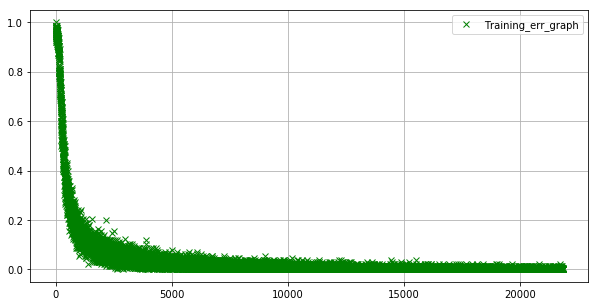

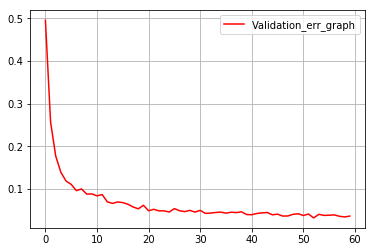

In [111]:
#plot evolution of training and validation accuracy over batches and epochs
x_t_acc=[i for i in  range(len(train_acc))]
#print(train_acc[-1])

x_v_acc=[i for i in range(len(valid_acc))]
#print(valid_acc)

plt.figure(1,figsize=(10,5))
plt.plot(x_t_acc,[1-i for i in train_acc],'xg',label='Training_err_graph')
plt.grid()
plt.legend()

plt.figure(2)
plt.plot(x_v_acc,[1-i for i in valid_acc],'-r',label="Validation_err_graph")
plt.grid()
plt.legend()


## Experiments

** Experiment1: colored pic, non normalization,random normal sampled weights and biases initialization, learn rate=0.1, epoch=10 **
*** Validation accuracy:0.861  accuracy gets stuck at around 0.83- from epoch 5 on*** 

***vanishing gradient?? very low weights initialized?? or overfitting, TRG accuracy is close to 100%***

** Exp2: Exp1 and dropout=0.5 **
***validation accuracy drops to 0.055!!, something funny going on, training accuracy reaches only 0.12, zero grads in backprop, saturated cells?? ***


** Exp3: Exp1 and dropout=0.8, validation accuracy: 0.706 training acc:.706**

** Exp4: colored,non normalized,trunc normal sampling,no dropout **
*** validation accuracy: 0.89, trg accuracy ~100%, overfitting??***

** Exp5: Exp4 + dropout=0.5 **
*** validation accuracy:0.055!! ***

**Exp6: colored normalized,trunc normal,nodropout : 0.905, valid acc starts at 0.7, trg accuracy almost 100%,overfitting??**

**Exp7: Exp6+ dropout=0.5 : validation accuracy:0.801, starts low at .25 training accuracy reaches 0.7, more training epochs?**

**Exp8 :  grayscaled,unnormalized ,nodropout, validation acc:  0.848**

**Exp9 :  grayscaled,unnormalized ,dropout=0.5, validation acc:  0.907**

**Exp10 : grayscaled,normalized ,dropout=0.5, validation acc:0.927  ** ***training accuracy doesn't reach 100% (about 90%)***

**Exp11 : Exp10 + epoch=30, validation acc:0.947  **  ***training accuracy reaches about 98% ***

**Exp12 : Exp10 + epoch=40, validation acc:0.960  **  ***training accuracy reaches about 99% ***

**Exp13 : some exps with hidden layer hyperparameters:  **
*** fc1 120--> 200, fc2 84--> 100, learnrate --> 0.0008, dropout=0.7 batch size=128, epoch=40**
*** the error curve is too steep, reduce learn rate to 0.0005***

**Exp14 : some exps with hidden layer hyperparameters:0.954  **
*** fc1 120--> 200, fc2 84--> 100, learnrate --> 0.0005, dropout=0.7 batch size=128, epoch=40**

*** increase images in bins that has very low counts, target is to increase the bins with < 800 count to 800***
*** blur,affinine transforms and rotation are the methods used fron opencv*** 
**Exp15 : Exp 14 + added samples to training data with classes that has less than 800 images:0.945  ** 
*** validation accuracy didn't increase, learning rate looks nice though !!***

**Exp16 : Exp15 + epoch=60 :0.947, no improvement increasing epoch, may be learning rate should be further decreased or dropout threshold decreased**

** At this point testaccuracy = 0.934 **


** Implement Lecun's paper model for traffic sign**
*** One trial with Exp16 and sermanet : 0.963 --> not much of improvement*** 

** final run **
*** epoch=60, learnrate=0.0005, dropout=0.5, validation accuracy:0.954***

**test accuracy: 0.942**


In [112]:
#Evaluate the Model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet_german_traffic_sign
Test Accuracy = 0.942


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

## Additional new images
** 8 pictures of german traffic signs from web are downloaded **
**The images are resized to 32x32 pix,grayscaled and normalized **
**Then run via Lenet_gray function (logits variable) **
**Accuracy achieved is 0.5, although for 7 pictures out of 8 the correct label appear in top 5 softmax probability **

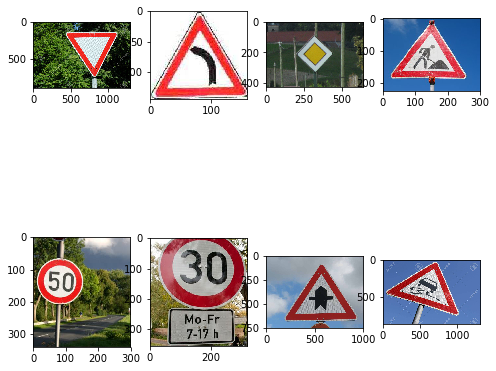

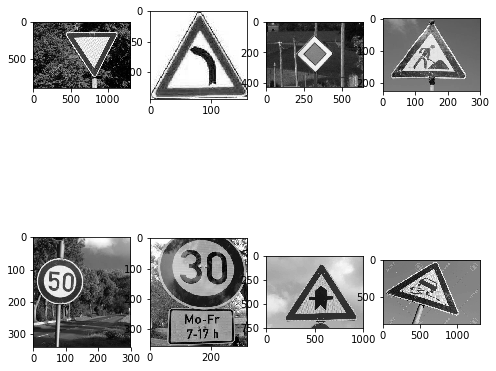

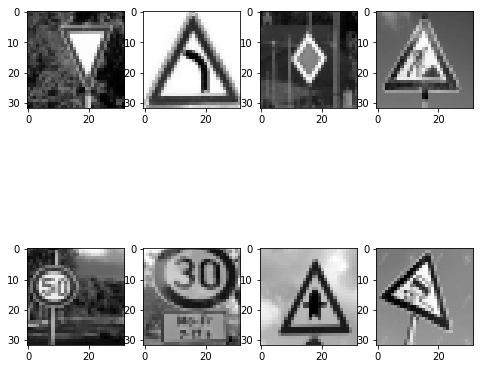

In [140]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


#6 pictures from web are downloaded, 3 that have high samples in trg set and 3 with low sample count
#they are resized to 32x32
import cv2
import numpy as np
import matplotlib.pyplot as plt
#load colored images
yield_pic=plt.imread('yield.jpg')
curve_left=plt.imread('curveleft.jpg')
priority_road=plt.imread('priorityroad.jpg')
road_work=plt.imread('construction.jpg')
speed_50=plt.imread('50speed.jpg')
speed_30=plt.imread('30speedlimit_n.jpg')
right_of_way=plt.imread('rightofway.jpg')
slippery=plt.imread('slippery.jpg')


fig_c, axs_c = plt.subplots(2,4, figsize=(8, 8))
axs_c = axs_c.ravel()
#plot colored pics
axs_c[0].imshow(yield_pic)
axs_c[1].imshow(curve_left)
axs_c[2].imshow(priority_road)
axs_c[3].imshow(road_work)
axs_c[4].imshow(speed_50)
axs_c[5].imshow(speed_30)
axs_c[6].imshow(right_of_way)
axs_c[7].imshow(slippery)

#now convert them to grayscale
yield_pic_g=cv2.cvtColor(yield_pic,cv2.COLOR_BGR2GRAY)
curve_left_g=cv2.cvtColor(curve_left,cv2.COLOR_BGR2GRAY)
priority_road_g=cv2.cvtColor(priority_road,cv2.COLOR_BGR2GRAY)
road_work_g=cv2.cvtColor(road_work,cv2.COLOR_BGR2GRAY)
speed_50_g=cv2.cvtColor(speed_50,cv2.COLOR_BGR2GRAY)
speed_30_g=cv2.cvtColor(speed_30,cv2.COLOR_BGR2GRAY)
right_of_way_g=cv2.cvtColor(right_of_way,cv2.COLOR_BGR2GRAY)
slippery_g=cv2.cvtColor(slippery,cv2.COLOR_BGR2GRAY)

fig_g, axs_g = plt.subplots(2,4, figsize=(8, 8))
axs_g = axs_g.ravel()
#plot colored pics
axs_g[0].imshow(yield_pic_g,cmap='gray')
axs_g[1].imshow(curve_left_g,cmap='gray')
axs_g[2].imshow(priority_road_g,cmap='gray')
axs_g[3].imshow(road_work_g,cmap='gray')
axs_g[4].imshow(speed_50_g,cmap='gray')
axs_g[5].imshow(speed_30_g,cmap='gray')
axs_g[6].imshow(right_of_way_g,cmap='gray')
axs_g[7].imshow(slippery_g,cmap='gray')
#now resize to 32x32
yield_pic_res = cv2.resize(yield_pic_g,(32, 32), interpolation = cv2.INTER_AREA)
curve_left_res=cv2.resize(curve_left_g,(32, 32), interpolation = cv2.INTER_AREA)
priority_road_res=cv2.resize(priority_road_g,(32, 32), interpolation = cv2.INTER_AREA)
road_work_res=cv2.resize(road_work_g,(32, 32), interpolation = cv2.INTER_AREA)
speed_50_res=cv2.resize(speed_50_g,(32, 32), interpolation = cv2.INTER_AREA)
speed_30_res=cv2.resize(speed_30_g,(32, 32), interpolation = cv2.INTER_AREA)
right_of_way_res=cv2.resize(right_of_way_g,(32, 32), interpolation = cv2.INTER_AREA)
slippery_res=cv2.resize(slippery_g,(32, 32), interpolation = cv2.INTER_AREA)

fig_r, axs_r = plt.subplots(2,4, figsize=(8, 8))
axs_r = axs_r.ravel()
axs_r[0].imshow(yield_pic_res,cmap='gray')
axs_r[1].imshow(curve_left_res,cmap='gray')
axs_r[2].imshow(priority_road_res,cmap='gray')
axs_r[3].imshow(road_work_res,cmap='gray')
axs_r[4].imshow(speed_50_res,cmap='gray')
axs_r[5].imshow(speed_30_res,cmap='gray')
axs_r[6].imshow(right_of_way_res,cmap='gray')
axs_r[7].imshow(slippery_res,cmap='gray')

plt.show()

INFO:tensorflow:Restoring parameters from .\lenet_german_traffic_sign
nr of samples in test_r (8, 32, 32)
nr of labels in test_r (8,)
label: 13  picture chosen from train set to plot: 88
label: 19  picture chosen from train set to plot: 196
label: 12  picture chosen from train set to plot: 62
label: 25  picture chosen from train set to plot: 108
label: 2  picture chosen from train set to plot: 77
label: 1  picture chosen from train set to plot: 105
label: 11  picture chosen from train set to plot: 39
label: 23  picture chosen from train set to plot: 29


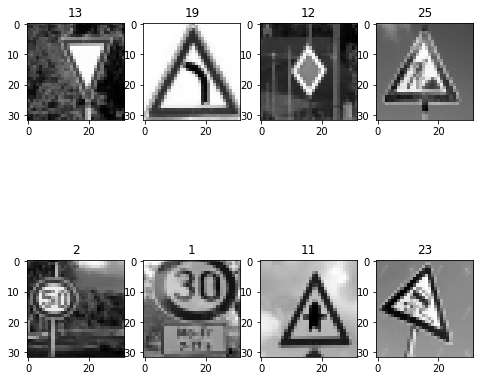

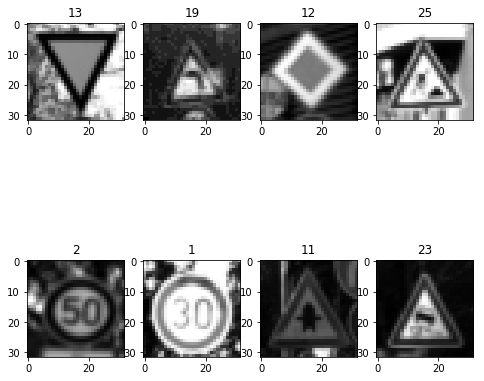

In [143]:
import tensorflow as tf
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

#add picts to X_test_r and y_test_r and then normalize
X_test_r=[]
X_test_r.append(yield_pic_res)
X_test_r.append(curve_left_res)
X_test_r.append(priority_road_res)
X_test_r.append(road_work_res)
X_test_r.append(speed_50_res)
X_test_r.append(speed_30_res)
X_test_r.append(right_of_way_res)
X_test_r.append(slippery_res)
X_test_r=np.array(X_test_r)

y_test_r=np.array([13])
y_test_r=np.concatenate((y_test_r,[19]),axis=0)
y_test_r=np.concatenate((y_test_r,[12]),axis=0)
y_test_r=np.concatenate((y_test_r,[25]),axis=0)
y_test_r=np.concatenate((y_test_r,[2]),axis=0)
y_test_r=np.concatenate((y_test_r,[1]),axis=0)
y_test_r=np.concatenate((y_test_r,[11]),axis=0)
y_test_r=np.concatenate((y_test_r,[23]),axis=0)

y_test_str=[]
y_test_str.append('yield')
y_test_str.append('curve left')
y_test_str.append('priority road')
y_test_str.append('road work')
y_test_str.append('speed limit 50')
y_test_str.append('speed limit 30')
y_test_str.append('right of way')
y_test_str.append('slippery road')


print("nr of samples in test_r",X_test_r.shape)
print("nr of labels in test_r",y_test_r.shape)

#Normalize
X_test_r=(X_test_r)/255.0 -0.5

fig_p, axs_p = plt.subplots(2,4, figsize=(8, 8))
axs_p = axs_p.ravel()

for i in range(X_test_r.shape[0]):
    axs_p[i].imshow(X_test_r[i],cmap='gray')
    axs_p[i].set_title(y_test_r[i])
    
#paranoid check on labels
fig_pp, axs_pp = plt.subplots(2,4, figsize=(8, 8))
axs_pp = axs_pp.ravel()
labels_in_test=list(y_test_r)
cc=0
for i in labels_in_test:
    print("label:",i,end='  ')
    imgs_class_i=np.where(y_train == i)
    #print(imgs_class_i[0].shape)
    index=imgs_class_i[0]
    print("picture chosen from train set to plot:",index[1])
    axs_pp[cc].imshow(X_train[index[1]].squeeze(),cmap='gray')
    axs_pp[cc].set_title(y_train[index[1]])
    
    cc +=1
    

### Predict the Sign Type for Each Image

In [144]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #print("len",len(X_test_r))
    pic_type=[]
    softmax=[]
    for i in range(len(X_test_r)):
        #print("pic of type",y_test_r[i])
        pic_type.append(y_test_r[i])
        new_pics_pred = sess.run(logits, feed_dict={x:X_test_r[i].reshape(-1,32,32,1) , keep_prob : 1.0})
        softmax.append(sess.run(tf.nn.softmax(new_pics_pred)))
    #print("Softmax",softmax)
    result = np.array([i.argmax() for i in softmax])
    #print("Res",result)  
    for i in range(len(pic_type)):
        print("image of class:{}, Predicted max probability:{}".format(pic_type[i],result[i]))

INFO:tensorflow:Restoring parameters from .\lenet_german_traffic_sign
image of class:13, Predicted max probability:13
image of class:19, Predicted max probability:37
image of class:12, Predicted max probability:12
image of class:25, Predicted max probability:25
image of class:2, Predicted max probability:11
image of class:1, Predicted max probability:23
image of class:11, Predicted max probability:11
image of class:23, Predicted max probability:38


### Analyze Performance

In [145]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_r_accuracy = evaluate(X_test_r.reshape(-1,32,32,1), y_test_r)
    print("Test acc on new images",test_r_accuracy)


INFO:tensorflow:Restoring parameters from .\lenet_german_traffic_sign
Test acc on new images 0.5


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [146]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k=sess.run(tf.nn.top_k(np.array(softmax), k=5))
    print(top_k)
    #print(top_k[1].shape)


INFO:tensorflow:Restoring parameters from .\lenet_german_traffic_sign
TopKV2(values=array([[[  9.62313175e-01,   2.11456772e-02,   1.50568923e-02,
           1.39096472e-03,   8.60864675e-05]],

       [[  9.75930989e-01,   2.40689591e-02,   1.14918142e-09,
           3.48603091e-10,   3.05601220e-14]],

       [[  9.87701952e-01,   5.16805099e-03,   5.08115627e-03,
           1.23928988e-03,   2.93366757e-04]],

       [[  9.99999166e-01,   8.76076911e-07,   1.86173332e-09,
           1.14127618e-09,   2.49541054e-10]],

       [[  6.90997422e-01,   2.99835861e-01,   4.98393085e-03,
           2.07944401e-03,   1.28148159e-03]],

       [[  9.20018911e-01,   5.22794835e-02,   1.46667510e-02,
           6.10791240e-03,   5.17213065e-03]],

       [[  1.00000000e+00,   4.80503903e-09,   3.80889126e-10,
           3.40529792e-11,   2.62502964e-14]],

       [[  9.59587455e-01,   2.97586471e-02,   4.63108346e-03,
           4.60513867e-03,   6.55591022e-04]]], dtype=float32), indices=arra

C:\Users\atpandey\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


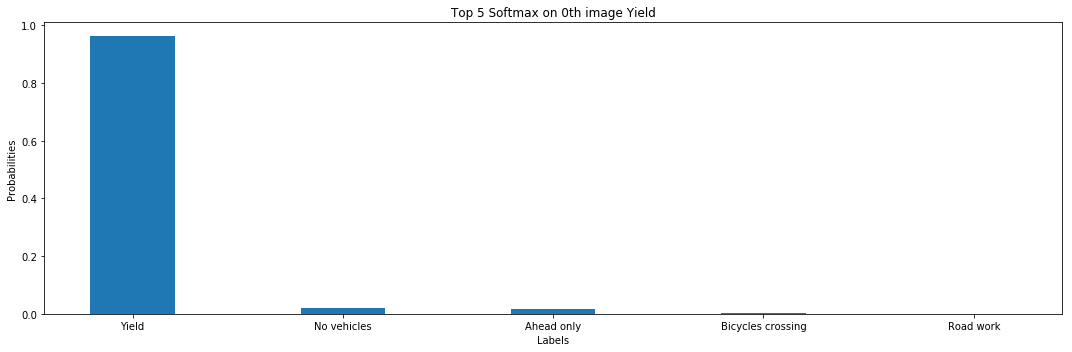

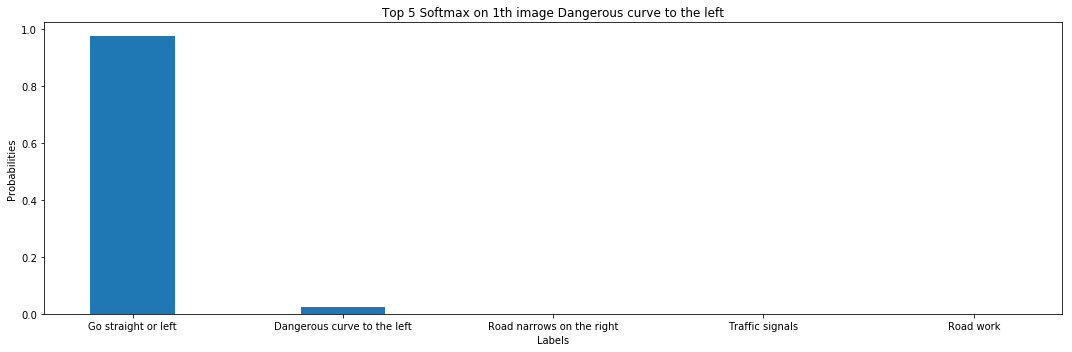

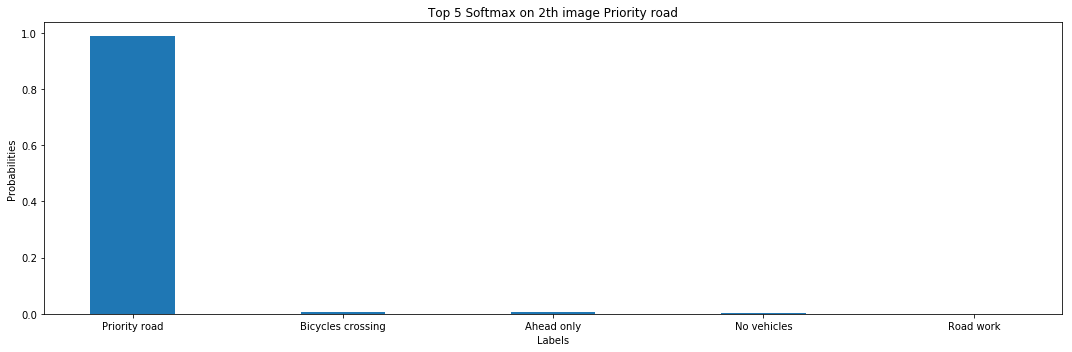

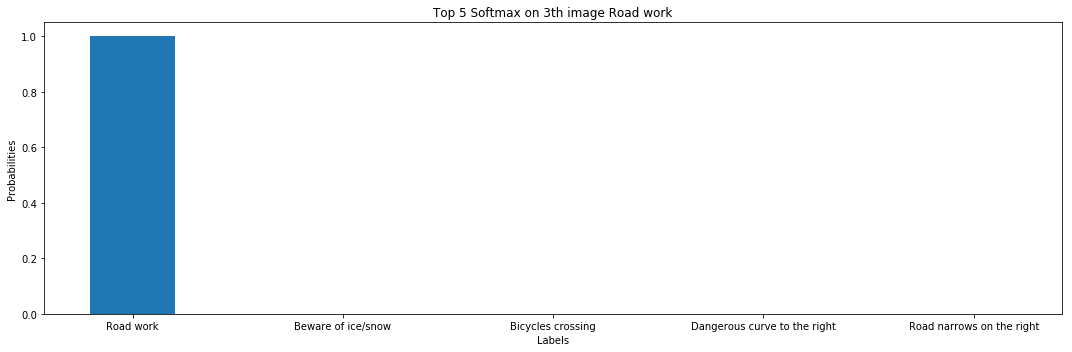

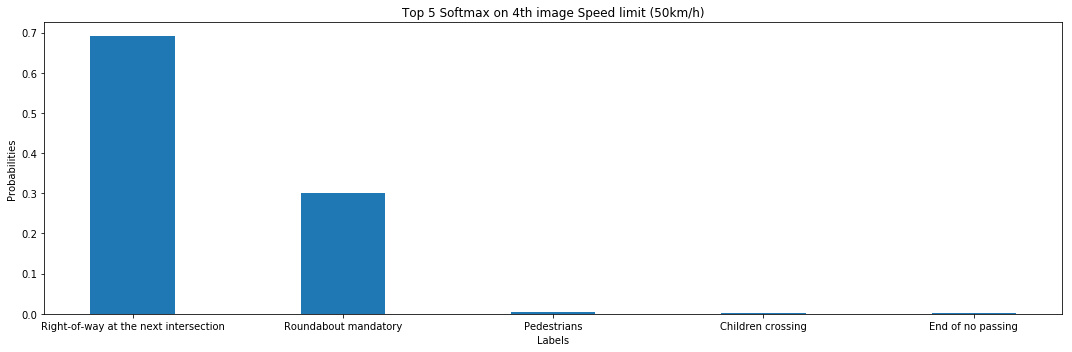

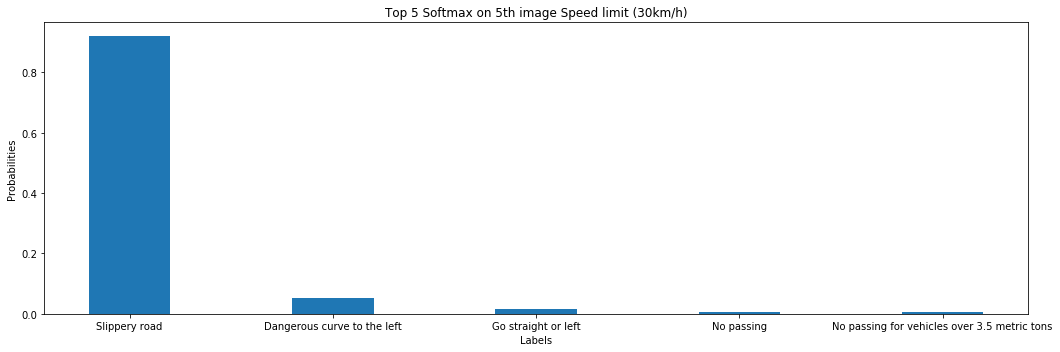

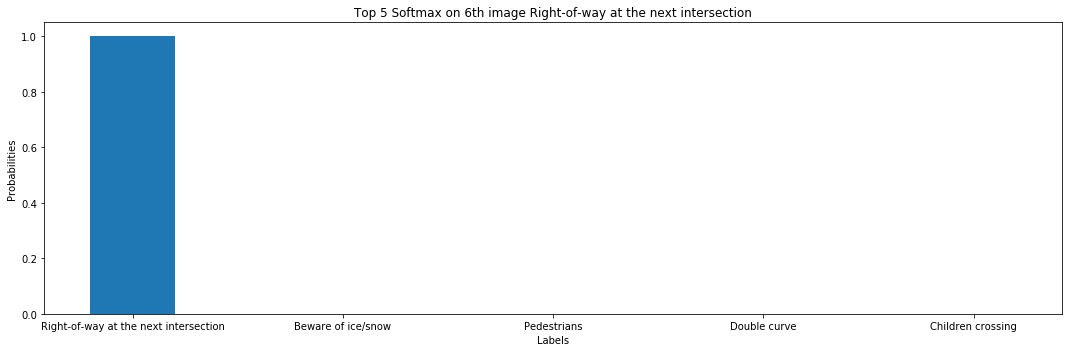

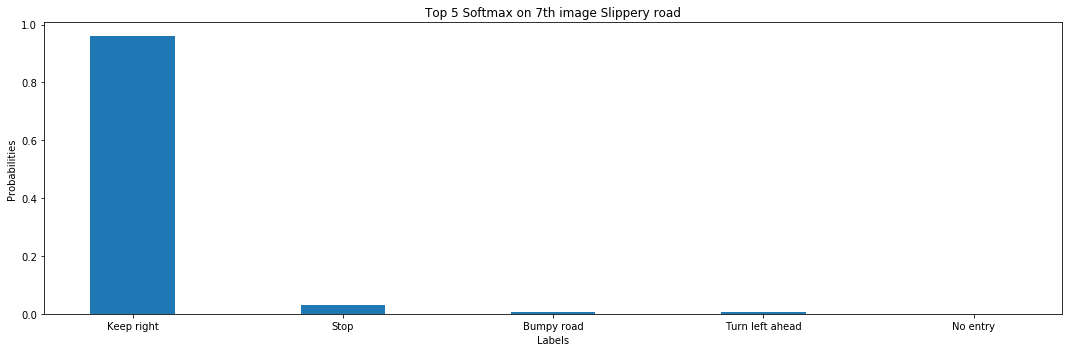

In [226]:
# plot histogram of classes predicted by top_k
import csv
top_k_prob_val=top_k[0].reshape(8,5)
#print("prob vals",top_k_prob_val.shape)

top_k_prob=top_k[1].reshape(8,5)
#print("5 top labels",top_k_prob_val.shape)


#lets read in signames.csv file to get the mapping

sign_nr=[]
sign_val=[]
f = open("signnames.csv",'r')
for row in csv.reader(f):
    sign_nr.append(row[0])
    sign_val.append(row[1])
f.close()
#print("Sign nr",sign_nr)
##########################################
for i in range(len(top_k_prob_val)):
    y= top_k_prob_val[i]
    x_pholder= top_k_prob[i]
    x=[sign_val[sign_nr.index(str(j))] for j in x_pholder ]
    #print("x",x)
    idx=np.arange(5)
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.bar(idx, y, 0.4)
    #plt.bar(idx,y,align='center',width=2)
    plt.xlabel('Labels')
    plt.ylabel('Probabilities')
    title='Top 5 Softmax on '+str(i)+'th image '+ sign_val[sign_nr.index(str(y_test_r[i]))]
    plt.title(title)
    plt.xticks(idx, (x[0], x[1], x[2], x[3], x[4]))
    plt.legend()
    plt.tight_layout()
    plt.show()
    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


Chosen Index in training set is: 46105
Picture is of type: 0


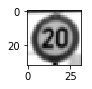

In [227]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a 
#specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to 
#the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for
#each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob : 1.0})
    print("Activation shape:",activation.shape)
    featuremaps = activation.shape[3]
    #featuremaps = activation.shape[1]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        print("featuremap shape:",activation[featuremap].shape)
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
#pick a random picture from train set and plot it
index_train=random.randint(0, len(X_train))
print("Chosen Index in training set is:",index_train)
image_train = X_train[index_train]
plt.figure(figsize=(1,1))
plt.imshow(image_train.squeeze(),cmap='gray')
print("Picture is of type:",y_train[index_train])

#couldn't figure what does tf_activation name shall be

#with tf.Session() as sess:
#    saver.restore(sess, tf.train.latest_checkpoint('.'))
#    outputFeatureMap(image_train.reshape(-1,32,32,1), wc1, activation_min=-1, activation_max=-1 ,plt_num=1)

#Another approach would be to declare weights and bisases outof Lenet_gray function
#then to get features of each conv layes can be simply obtained by reconvolving weights for that layer and image (for first layer)
# and in general by convolving/multiplying output of previous layer by weight of current layer